In [1]:
# basic
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# data manipulation
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# preset data
from sklearn.datasets import load_breast_cancer

# Naïve Bayesian
hw 3

## Cancer Data Setup

In [2]:
dataset = load_breast_cancer()

In [3]:
cancer_data = dataset.data
cancer_data.shape

(569, 30)

In [4]:
cancer_labels = dataset.target
cancer_labels = np.reshape(cancer_labels,(len(cancer_labels),1))
cancer_labels.shape

(569, 1)

In [5]:
cancer_data = np.concatenate([cancer_data,cancer_labels],axis=1)
cancer_data.shape

(569, 31)

In [6]:
cancer_df = pd.DataFrame(cancer_data)
cancer_df.columns = np.append(dataset.feature_names, 'target')
print(f'Shape: {cancer_df.shape}')
cancer_df.tail()

Shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [7]:
def remap_labels(data_series):
    data_series.replace(0, 'Benign',inplace=True)
    data_series.replace(1, 'Malignant',inplace=True)

In [8]:
remap_labels(cancer_df['target'])
cancer_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [9]:
x_true = (cancer_df.copy())
y_true = x_true.pop('target')
x_true = x_true.values
y_true = y_true.values
print(x_true.shape)
print(y_true.shape)

(569, 30)
(569,)


## Problem 1

### Setup

In [10]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_true, y_true, test_size = 0.2, random_state=22)

title = "Naïve Bayesian Model"
class_names=['Benign','Malignant'] # name of classes

print("x training size: ", x_train.shape)
print("y training size: ", y_train.shape)
print("x test size: ", x_test.shape)
print("y test size: ", y_test.shape)

x training size:  (455, 30)
y training size:  (455,)
x test size:  (114, 30)
y test size:  (114,)


In [11]:
# scaler = MinMaxScaler()
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Operation

In [12]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

### Result

In [13]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [14]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, pos_label=class_names[1])
recall = metrics.recall_score(y_test, y_pred, pos_label=class_names[1])
 
print("accuracy is", accuracy)
print("precision is", precision)
print("recall is", recall)

accuracy is 0.9649122807017544
precision is 0.958904109589041
recall is 0.9859154929577465


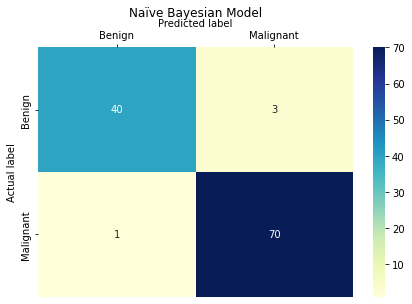

In [15]:
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")
plt.tight_layout()
plt.title(title, y=1.1);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

## Problem 2

### Setup

In [16]:
x_df = cancer_df.copy()
y_df = x_df.pop('target')

features = x_df.columns.values

x = x_df.values
y = y_df.values

In [17]:
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

print(f"{features.shape} with values of", features)

x shape: (569, 30)
y shape: (569,)
(30,) with values of ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [18]:
# scaler = MinMaxScaler()
scaler = StandardScaler()

x = scaler.fit_transform(x)

In [19]:
num_components = 3

title = str(num_components) + " Component PCA"
class_names=['Benign','Malignant'] # name of classes
column_components = ['Component ' + str(item)   for item in range(1, num_components+1)]
print(column_components)

['Component 1', 'Component 2', 'Component 3']


### Decomposition

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=num_components, )
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents, 
                           columns = column_components
               )

In [21]:
final_df = pd.concat([principal_df, y_df.copy()], axis = 1)
final_df

,Component 1,Component 2,Component 3,target
0,9.192837,1.948583,-1.123124,Benign
1,2.387802,-3.768172,-0.529298,Benign
2,5.733896,-1.075174,-0.551733,Benign
3,7.122953,10.275588,-3.232711,Benign
4,3.935302,-1.948072,1.389777,Benign
...,...,...,...,...
564,6.439315,-3.576818,2.459510,Benign
565,3.793382,-3.584048,2.088462,Benign
566,1.256179,-1.902297,0.562747,Benign
567,10.374794,1.672010,-1.877024,Benign


### Post-Decomposition

In [22]:
x_decomp = (cancer_df.copy())
y_decomp = x_decomp.pop('target')
x_decomp = x_decomp.values
y_decomp = y_decomp.values
print(x_decomp.shape)
print(y_decomp.shape)

(569, 30)
(569,)


In [23]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_decomp, y_decomp, test_size = 0.2, random_state=22)

print("x training size: ", x_train.shape)
print("y training size: ", y_train.shape)
print("x test size: ", x_test.shape)
print("y test size: ", y_test.shape)

x training size:  (455, 30)
y training size:  (455,)
x test size:  (114, 30)
y test size:  (114,)


### Operation

In [24]:
classifier = LogisticRegression(max_iter=4000, C=0.1)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

### Result

In [25]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)


In [26]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, pos_label=class_names[1])
recall = metrics.recall_score(y_test, y_pred, pos_label=class_names[1])
 
print("accuracy is", accuracy)
print("precision is", precision)
print("recall is", recall)

accuracy is 0.9473684210526315
precision is 0.9452054794520548
recall is 0.971830985915493


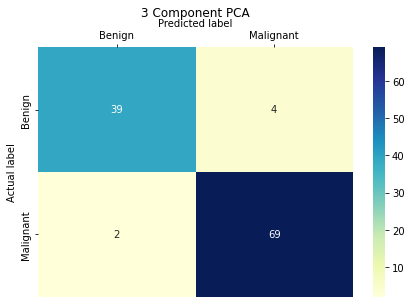

In [27]:
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")
plt.tight_layout()
plt.title(title, y=1.1);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

## Problem 3

### Setup

In [28]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_decomp, y_decomp, test_size = 0.2, random_state=22)

title = "Logistic Regression"
class_names=['Benign','Malignant'] # name of classes

print("x training size: ", x_train.shape)
print("y training size: ", y_train.shape)
print("x test size: ", x_test.shape)
print("y test size: ", y_test.shape)

x training size:  (455, 30)
y training size:  (455,)
x test size:  (114, 30)
y test size:  (114,)


In [29]:
# scaler = MinMaxScaler()
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Operation

In [30]:
classifier = LogisticRegression(max_iter=300, C=0.1)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

### Result

In [31]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [32]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, pos_label=class_names[1])
recall = metrics.recall_score(y_test, y_pred, pos_label=class_names[1])
 
print("accuracy is", accuracy)
print("precision is", precision)
print("recall is", recall)

accuracy is 0.9649122807017544
precision is 0.9466666666666667
recall is 1.0


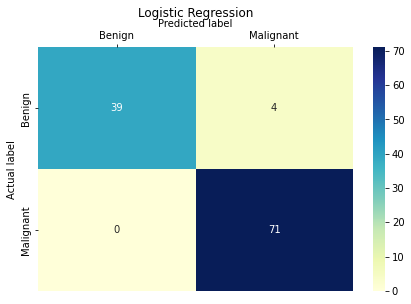

In [33]:
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")
plt.tight_layout()
plt.title(title, y=1.1);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');